In [1]:
# ! pip install pandas

# Задание 4. Разведочный анализ данных (Exploratory Data Analysis, EDA) с использованием `matplotlib`

## Цель задания
Провести самостоятельный разведочный анализ реального набора данных, содержащего категориальные признаки, с применением только библиотеки `matplotlib` для визуализации.

Цель — научиться быстро анализировать структуру данных, находить пропуски, аномалии и делать обоснованные выводы на основе графиков и статистик.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../TestData/Mental_Health_and_Social_Media_Balance_Dataset.csv')

## 1.	Общая характеристика данных (мин)

In [4]:
print(data.shape)
rows = data.shape[0]
cols = data.shape[1]
data.head(5)

(500, 10)


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [5]:
data.sample(5)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
161,U162,21,Female,3.4,9.0,7.0,5.0,1.0,YouTube,8.0
431,U432,33,Female,6.9,6.0,7.0,0.0,4.0,Instagram,7.0
76,U077,48,Female,9.7,4.0,8.0,5.0,1.0,LinkedIn,5.0
348,U349,34,Male,4.1,8.0,4.0,5.0,4.0,LinkedIn,10.0
200,U201,35,Female,5.2,7.0,6.0,4.0,0.0,Facebook,10.0


In [6]:
data.columns.tolist()

['User_ID',
 'Age',
 'Gender',
 'Daily_Screen_Time(hrs)',
 'Sleep_Quality(1-10)',
 'Stress_Level(1-10)',
 'Days_Without_Social_Media',
 'Exercise_Frequency(week)',
 'Social_Media_Platform',
 'Happiness_Index(1-10)']

Видим, что датасет содержит следующие столбцы

| Колонка                      | Описание                                                                 | Тип признака (числовой или категориальный) |
|------------------------------|--------------------------------------------------------------------------|---------------------------------------------|
| Age                          | Возраст человека (в годах)                                              | Числовой                                    |
| Gender                       | Пол человека                                                             | Категориальный                              |
| Daily_Screen_Time(hrs)       | Ежедневное время за экраном (в часах)                                   | Числовой                                    |
| Sleep_Quality(1-10)          | Качество сна по шкале от 1 до 10 (где 10 — отлично)                     | Числовой                                    |
| Stress_Level(1-10)           | Уровень стресса по шкале от 1 до 10 (где 10 — максимальный стресс)      | Числовой                                    |
| Days_Without_Social_Media    | Количество дней без использования социальных сетей                      | Числовой                                    |
| Exercise_Frequency(week)     | Количество дней занятий спортом в неделю                                        | Числовой                                    |
| Social_Media_Platform        | Основная социальная сеть, которой пользуется человек                     | Категориальный                              |
| Happiness_Index(1-10)        | Индекс счастья по шкале от 1 до 10 (где 10 — максимальный уровень счастья) | Числовой                                 |



In [7]:
# --- Определяем числовые и категориальные признаки ---
numeric_cols = [
    'Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)', 
    'Stress_Level(1-10)', 'Days_Without_Social_Media',
    'Exercise_Frequency(week)', 'Happiness_Index(1-10)'
]

categorical_cols = ['Gender', 'Social_Media_Platform']


## 2.	Анализ пропусков

In [8]:
data.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

In [9]:
hidden_nulls = ["", " ", "?", "N/A", "NA", "None"]

data.isin(hidden_nulls).sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

Однако я заметил значения 'Other' в столбце 'Gender'. Они по сути являются отсутствием данных о поле человека - пропусками

In [10]:
data['Gender'].value_counts()

Gender
Male      248
Female    229
Other      23
Name: count, dtype: int64

In [11]:
print(data['Gender'].value_counts()['Other'] / rows * 100, '%')

4.6 %


Доля данны довольно маленькая (<10%).
Нужно определить на сколько данные о поле нужны для нашего последующего анализа. Например, если целью стоит сравнение поведения двух полов или выявления зависимостей от пола, то таки данные не дадут полезной иформации и их можно удалить. Если же дынне несут вспомогательный характер, то ихлучше сохранить чтобы не уменьшать размеры датасета. Мне интересно было бы провести сравнение полов, поэтому я сразу выберу стратегию удаления строк. 

In [12]:
data = data.drop(data[data['Gender'] == 'Other'].index)
data['Gender'].value_counts()

Gender
Male      248
Female    229
Name: count, dtype: int64

In [13]:
rows = data.shape[0]

# 3.	Статистические оценки

In [14]:
# --- Статистика для числовых признаков ---
numeric_stats = data[numeric_cols].agg(
    ['mean', 'median', 'std', 'min', 'max']
).T

print("Числовые признаки — статистика:")
print(numeric_stats)


# --- Статистика для категориальных признаков ---
categorical_stats = {}

for col in categorical_cols:
    mode_value = data[col].mode()[0]
    value_counts = data[col].value_counts(dropna=False)
    
    categorical_stats[col] = {
        'mode': mode_value,
        'distribution': value_counts
    }

print("\nКатегориальные признаки — статистика:")
for col, stats in categorical_stats.items():
    print(f"\n{col}:")
    print("  Мода:", stats['mode'])
    print("  Распределение категорий:")
    print(stats['distribution'])

Числовые признаки — статистика:
                                mean  median       std   min   max
Age                        33.148847    34.0  9.926032  16.0  49.0
Daily_Screen_Time(hrs)      5.552411     5.6  1.744059   1.0  10.8
Sleep_Quality(1-10)         6.287212     6.0  1.532321   2.0  10.0
Stress_Level(1-10)          6.618449     7.0  1.545227   2.0  10.0
Days_Without_Social_Media   3.140461     3.0  1.867226   0.0   9.0
Exercise_Frequency(week)    2.448637     2.0  1.427514   0.0   7.0
Happiness_Index(1-10)       8.356394     9.0  1.532157   4.0  10.0

Категориальные признаки — статистика:

Gender:
  Мода: Male
  Распределение категорий:
Gender
Male      248
Female    229
Name: count, dtype: int64

Social_Media_Platform:
  Мода: TikTok
  Распределение категорий:
Social_Media_Platform
TikTok         92
LinkedIn       83
X (Twitter)    82
Facebook       80
Instagram      71
YouTube        69
Name: count, dtype: int64


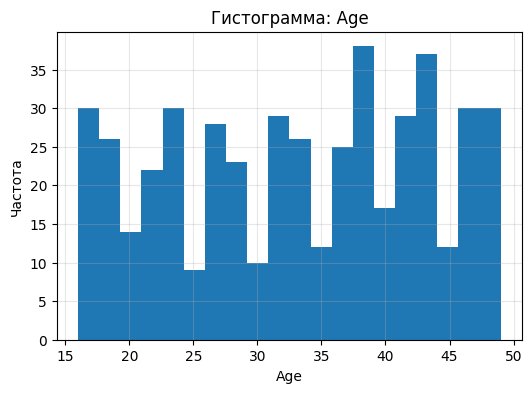

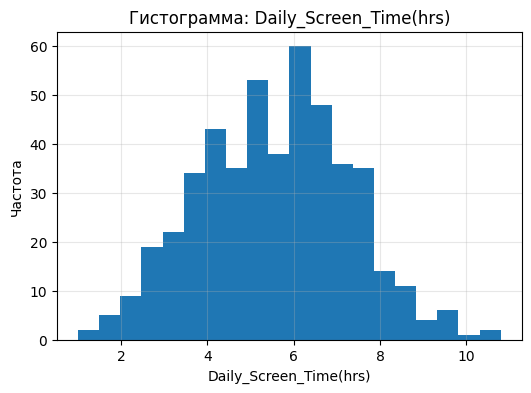

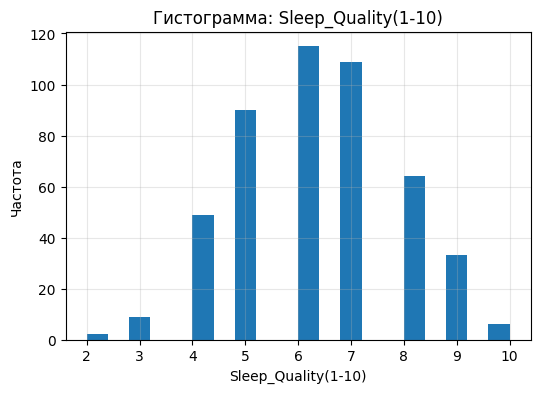

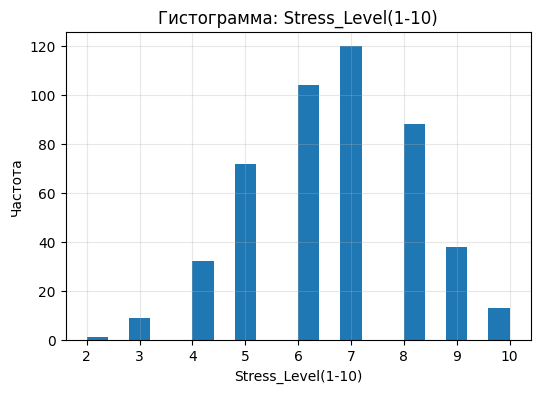

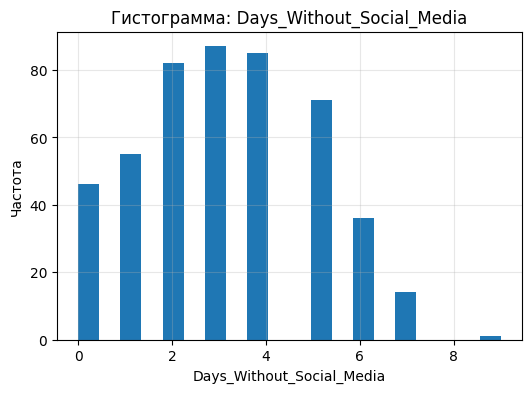

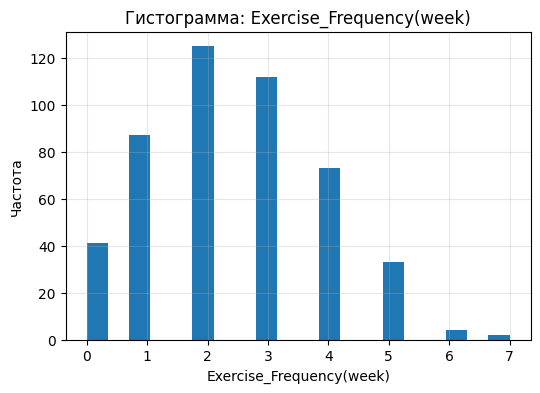

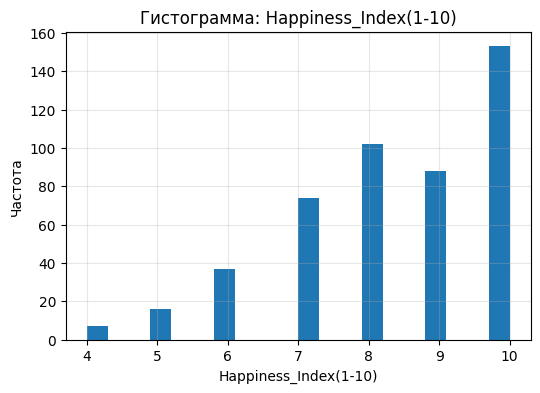

In [15]:
# --- Графики для числовых характеристик ---
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=20)
    plt.title(f'Гистограмма: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.grid(alpha=0.3)
    plt.show()

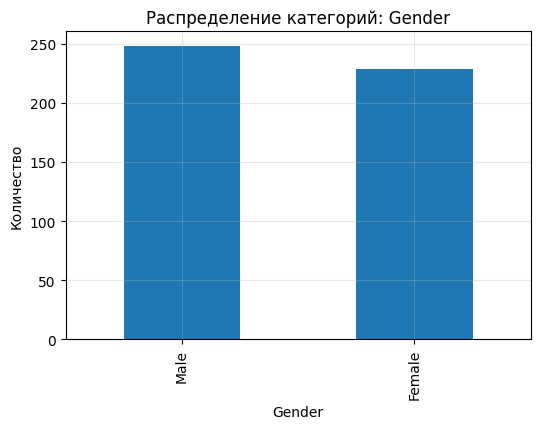

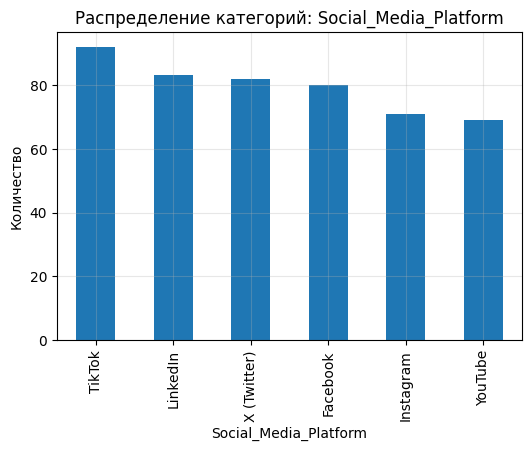

In [16]:
# --- Графики для категориальных характеристик ---
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Распределение категорий: {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.grid(alpha=0.3)
    plt.show()

## 4.	Выявление аномалий (выбросов)

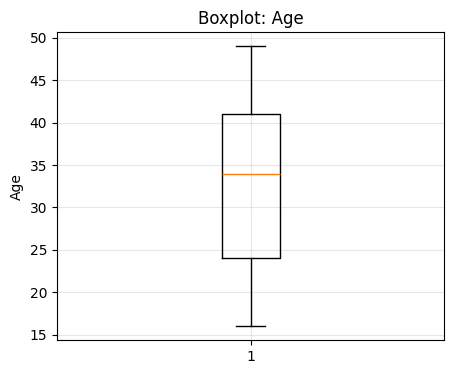

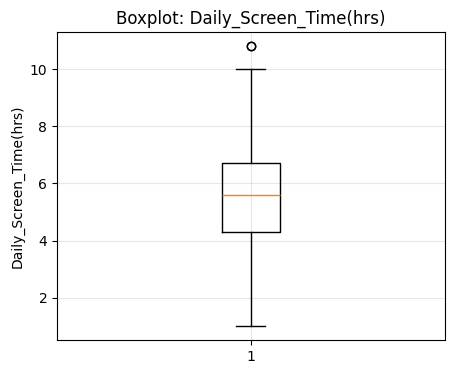

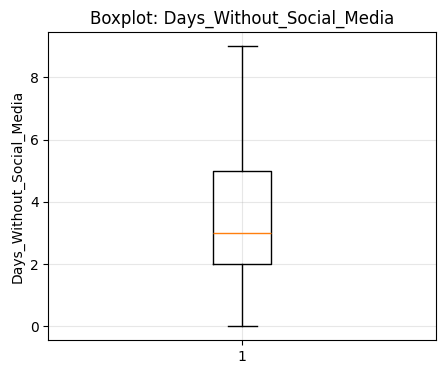

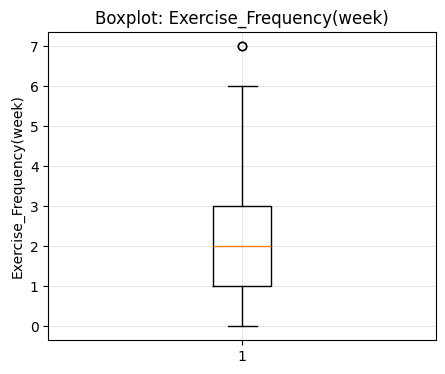

In [17]:
# Колонки с диапазоном 1–10 (нужно исключить)
bounded_1_10 = [
    'Sleep_Quality(1-10)',
    'Stress_Level(1-10)',
    'Happiness_Index(1-10)'
]

# Фильтрация: оставляем только "нормальные" числовые признаки
numeric_unbounded = [col for col in numeric_cols if col not in bounded_1_10]

# print("Колонки для анализа выбросов:", numeric_unbounded)

# Построение boxplot для каждого признака
for col in numeric_unbounded:
    plt.figure(figsize=(5, 4))
    plt.boxplot(data[col], vert=True)
    plt.title(f'Boxplot: {col}')
    plt.ylabel(col)
    plt.grid(alpha=0.3)
    plt.show()


In [18]:
col = 'Daily_Screen_Time(hrs)'
data[data[col]>10]

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
248,U249,46,Female,10.8,5.0,10.0,2.0,3.0,Instagram,4.0
325,U326,27,Male,10.8,2.0,9.0,3.0,2.0,X (Twitter),5.0


In [19]:
col = 'Exercise_Frequency(week)'
data[data[col]>6]

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
39,U040,23,Female,1.0,9.0,5.0,5.0,7.0,Facebook,10.0
489,U490,47,Female,4.9,7.0,7.0,1.0,7.0,Instagram,10.0


У нас и есть статистическое выбросы:
* В данных о времени проведённым за экраном - 11 часов возможно всего соответсвует стримеру, ютуберу или студенту. Так же данные не противоречат остальными столбцам - в них видны просадки в сне, счастье и повышенный стресс. Эти данные реальные.
* В данных о колчестве тренировко в день - 7 дней в неделю. Сложно сказать на сколько эти данные правдивы. Даже опытные спортсмены обязательно оставляют день отдыха и востановления, однако количество тренировок так же зависит от вида тернировок и для некоторых видов спорта (например йоги) эти данные могут быть реальными.

Таким образом не статистически найти выбросы не удалось. Удаялть ничего не будем

## 5.	Визуализация с помощью matplotlib

* Гистограмма (для распределения числового признака)

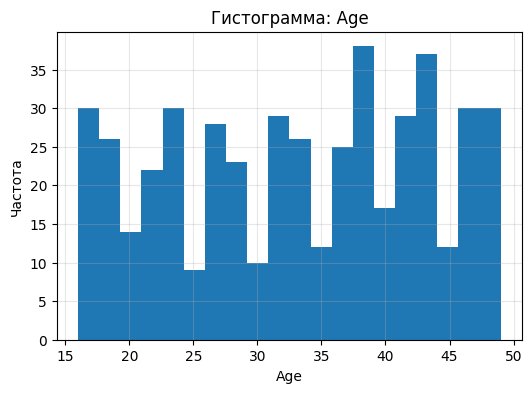

In [20]:
col = 'Age'
plt.figure(figsize=(6, 4))
plt.hist(data[col], bins=20)
plt.title(f'Гистограмма: {col}')
plt.xlabel(col)
plt.ylabel('Частота')
plt.grid(alpha=0.3)
plt.show()

* Столбчатая диаграмма (для распределения категориального признака)

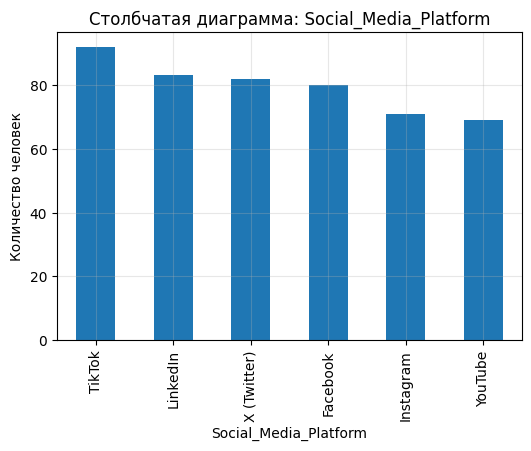

In [21]:
col = 'Social_Media_Platform'
plt.figure(figsize=(6, 4))
data[col].value_counts().plot(kind='bar')
plt.title(f'Столбчатая диаграмма: {col}')
plt.xlabel(col)
plt.ylabel('Количество человек')
plt.grid(alpha=0.3)
plt.show()

* Диаграмма рассеяния (scatter plot) с использованием пузырьков (размер точки должен кодировать третий признак — числовой или категориальный)

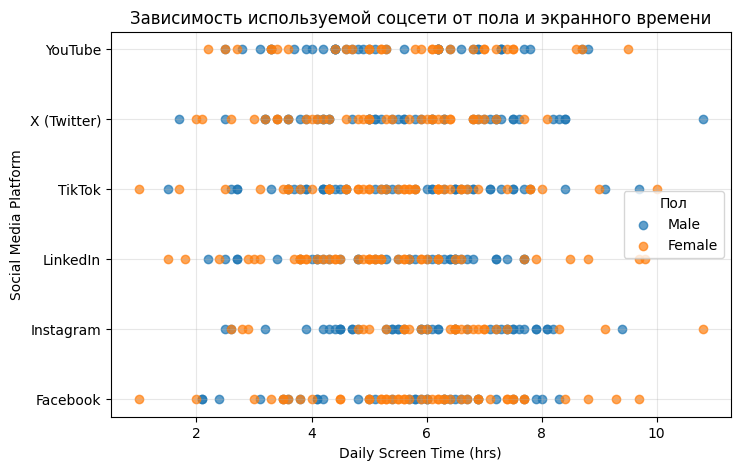

In [22]:
# Категориальное кодирование соцсетей
platforms = data['Social_Media_Platform'].astype('category')
platform_codes = platforms.cat.codes

plt.figure(figsize=(8, 5))

# Строим scatter plot с разделением по полу
for gender in data['Gender'].unique():
    subset = data[data['Gender'] == gender]
    
    plt.scatter(
        subset['Daily_Screen_Time(hrs)'],
        platform_codes[subset.index],
        label=gender,
        alpha=0.7
    )

# Настройка осей
plt.yticks(
    ticks=range(len(platforms.cat.categories)),
    labels=platforms.cat.categories
)

plt.xlabel("Daily Screen Time (hrs)")
plt.ylabel("Social Media Platform")
plt.title("Зависимость используемой соцсети от пола и экранного времени")
plt.grid(alpha=0.3)
plt.legend(title="Пол")
plt.show()


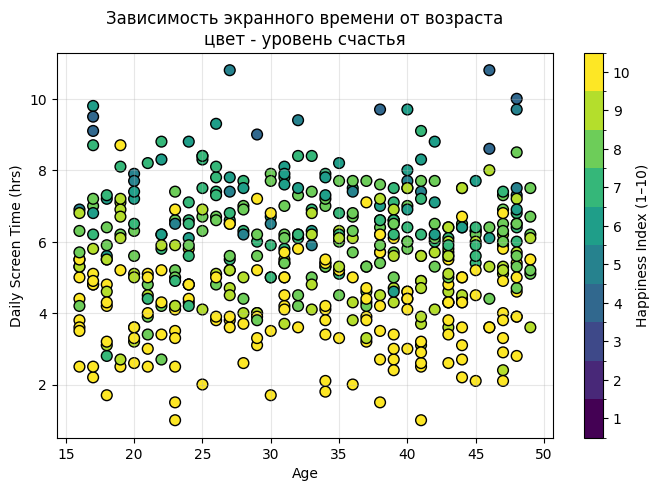

In [23]:
from matplotlib.colors import ListedColormap, BoundaryNorm

plt.figure(figsize=(8, 5))

# Округляем Happiness_Index до целого для дискретного цвета
happiness_rounded = data['Happiness_Index(1-10)'].round().astype(int)

# Создаём дискретную палитру (10 цветов для 1-10)
cmap = ListedColormap([
    '#440154', '#482878', '#3E4989', '#31688E', '#26828E',
    '#1F9E89', '#35B779', '#6DCD59', '#B4DE2C', '#FDE725'
])
bounds = np.arange(0.5, 11, 1)  # границы для 1-10
norm = BoundaryNorm(bounds, cmap.N)

# Строим scatter plot
scatter = plt.scatter(
    data['Age'],
    data['Daily_Screen_Time(hrs)'],
    c=happiness_rounded,
    cmap=cmap,
    norm=norm,
    s=60,  # одинаковый размер пузырьков
    edgecolors='black'
)

plt.title("Зависимость экранного времени от возраста\nцвет - уровень счастья")
plt.xlabel("Age")
plt.ylabel("Daily Screen Time (hrs)")
plt.grid(alpha=0.3)

# Легенда по цветам (дискретная)
cbar = plt.colorbar(scatter, ticks=np.arange(1, 11))
cbar.set_label("Happiness Index (1–10)")

plt.show()


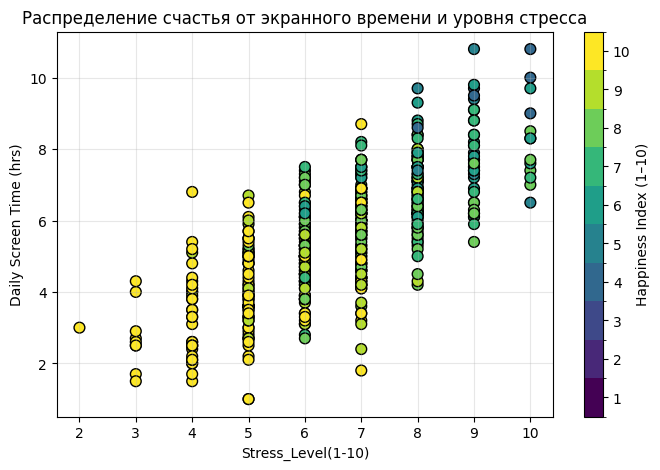

In [24]:
plt.figure(figsize=(8, 5))

# Округляем Happiness_Index на всякий случай до целого для дискретного цвета
happiness_rounded = data['Happiness_Index(1-10)'].round().astype(int)

bounds = np.arange(0.5, 11, 1)  # границы для 1-10
norm = BoundaryNorm(bounds, cmap.N)

# Строим scatter plot
scatter = plt.scatter(
    data['Stress_Level(1-10)'],
    data['Daily_Screen_Time(hrs)'],
    c=happiness_rounded,
    cmap=cmap,
    norm=norm,
    s=60,  # одинаковый размер пузырьков
    edgecolors='black'
)

plt.title("Распределение счастья от экранного времени и уровня стресса")
plt.xlabel("Stress_Level(1-10)")
plt.ylabel("Daily Screen Time (hrs)")
plt.grid(alpha=0.3)

# Легенда по цветам (дискретная)
cbar = plt.colorbar(scatter, ticks=np.arange(1, 11))
cbar.set_label("Happiness Index (1–10)")

plt.show()


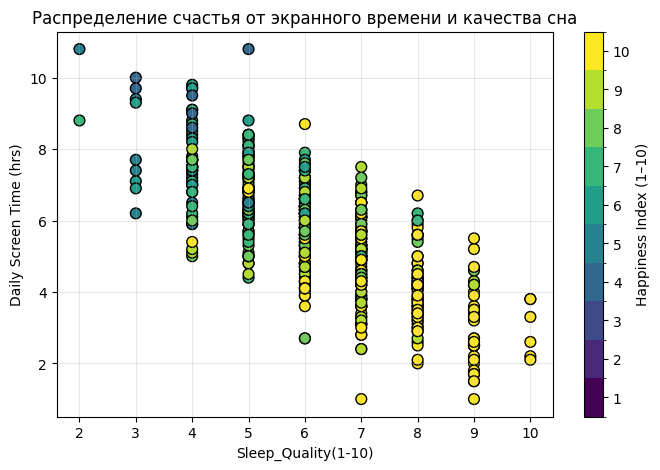

In [25]:
plt.figure(figsize=(8, 5))

# Округляем Happiness_Index на всякий случай до целого для дискретного цвета
happiness_rounded = data['Happiness_Index(1-10)'].round().astype(int)

bounds = np.arange(0.5, 11, 1)  # границы для 1-10
norm = BoundaryNorm(bounds, cmap.N)

# Строим scatter plot
scatter = plt.scatter(
    data['Sleep_Quality(1-10)'],
    data['Daily_Screen_Time(hrs)'],
    c=happiness_rounded,
    cmap=cmap,
    norm=norm,
    s=60,  # одинаковый размер пузырьков
    edgecolors='black'
)

plt.title("Распределение счастья от экранного времени и качества сна")
plt.xlabel("Sleep_Quality(1-10)")
plt.ylabel("Daily Screen Time (hrs)")
plt.grid(alpha=0.3)

# Легенда по цветам (дискретная)
cbar = plt.colorbar(scatter, ticks=np.arange(1, 11))
cbar.set_label("Happiness Index (1–10)")

plt.show()


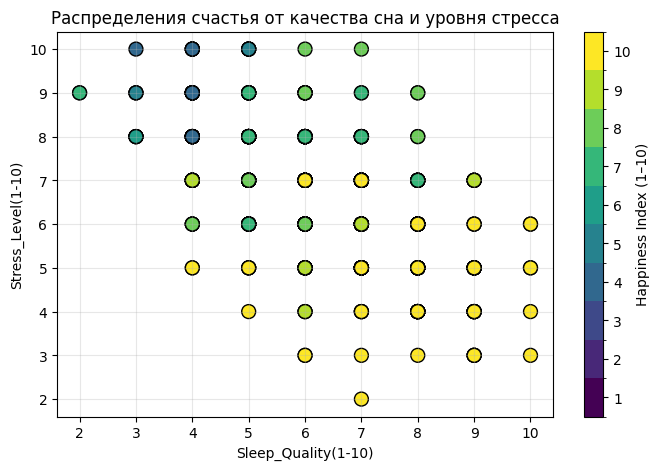

In [26]:
plt.figure(figsize=(8, 5))

# Округляем Happiness_Index на всякий случай до целого для дискретного цвета
happiness_rounded = data['Happiness_Index(1-10)'].round().astype(int)

bounds = np.arange(0.5, 11, 1)  # границы для 1-10
norm = BoundaryNorm(bounds, cmap.N)

# Строим scatter plot
scatter = plt.scatter(
    data['Sleep_Quality(1-10)'],
    data['Stress_Level(1-10)'],
    c=happiness_rounded,
    cmap=cmap,
    norm=norm,
    s=100,  # одинаковый размер пузырьков
    edgecolors='black'
)

plt.title("Распределения счастья от качества сна и уровня стресса")
plt.xlabel("Sleep_Quality(1-10)")
plt.ylabel("Stress_Level(1-10)")
plt.grid(alpha=0.3)

# Легенда по цветам (дискретная)
cbar = plt.colorbar(scatter, ticks=np.arange(1, 11))
cbar.set_label("Happiness Index (1–10)")

plt.show()


* Box plot для оценки выбросов

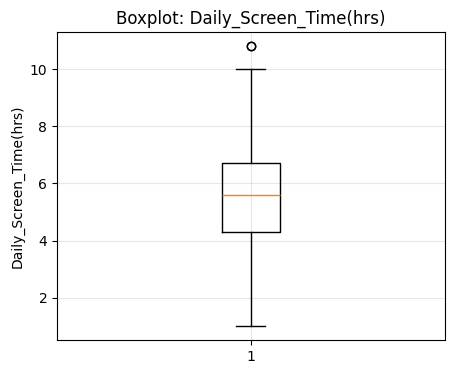

In [27]:
col = 'Daily_Screen_Time(hrs)'
plt.figure(figsize=(5, 4))
plt.boxplot(data[col], vert=True)
plt.title(f'Boxplot: {col}')
plt.ylabel(col)
plt.grid(alpha=0.3)
plt.show()

* Любая дополнительная визуализация по усмотрению (например, pie chart, line plot и т.д.)

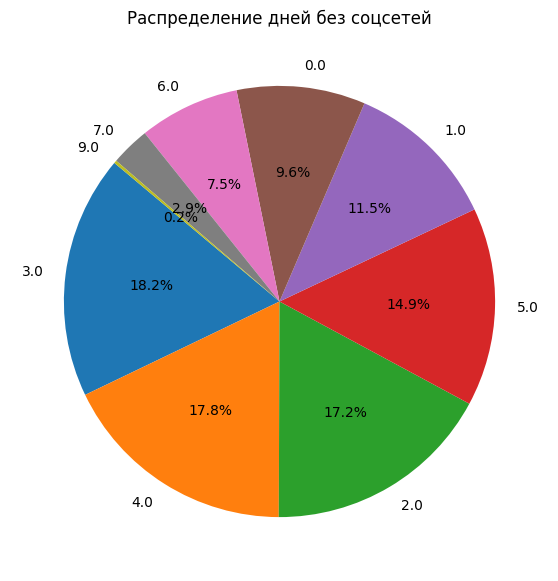

In [28]:
social_counts = data['Days_Without_Social_Media'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    social_counts,
    labels=social_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors
)
plt.title("Распределение дней без соцсетей")
plt.show()


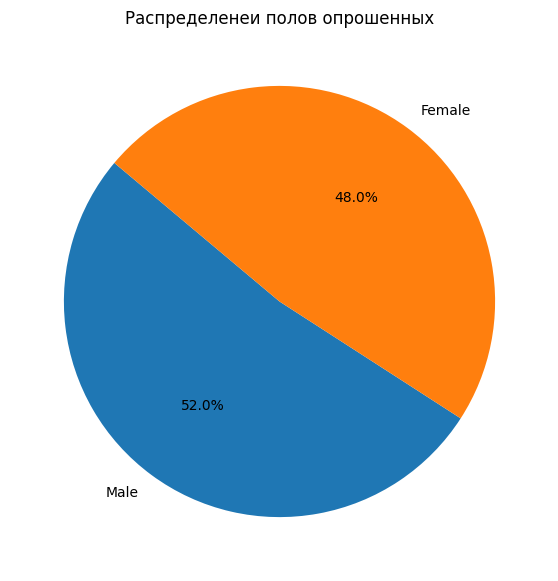

In [29]:
social_counts = data['Gender'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    social_counts,
    labels=social_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors
)
plt.title("Распределенеи полов опрошенных")
plt.show()


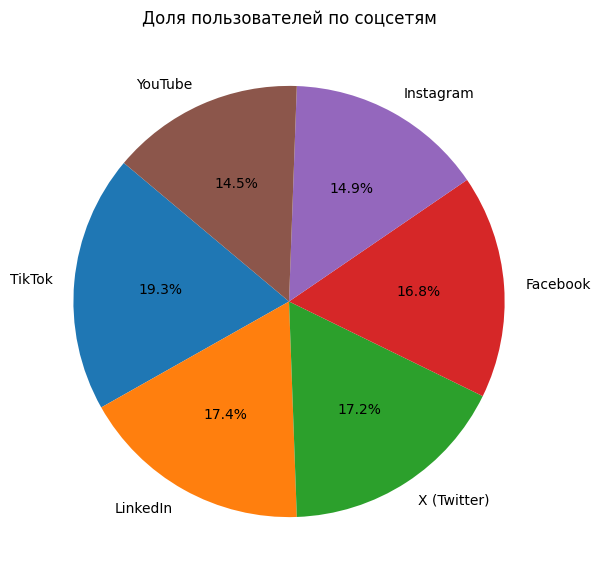

In [30]:
social_counts = data['Social_Media_Platform'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    social_counts,
    labels=social_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors
)
plt.title("Доля пользователей по соцсетям")
plt.show()


## 6.	Интерпретация и выводы

* Какие признаки наиболее информативны?

  Наиболее информативны были Stress_Level(1-10), Happiness_Index(1-10), Daily_Screen_Time(hrs), Sleep_Quality потому что между ними удалось заметить взаимосвязь. Качество сна улучается с уменьшением стресса и экранного времени. И от этого увеличивается показатель счастья. 

  Наименее информативны - Gender, Age, Social_Media_Platform потому, что они ни как не вляли на другие данные.

* Есть ли признаки с высоким уровнем пропусков или аномалий?


  Нет. Данные (за исключением Gender) полностью заполнены и аномальных значейний нет.
* Как распределены категории?

  Судя по графикам вида pie распределения по социальным сетям близкие. Разница не превышает 5%. По полу тоже разница маленькая. Всего 4%
* Какие гипотезы можно сформулировать на основе визуализаций?

  Качество сна улучается с уменьшением стресса и экранного времени. И от этого увеличивается показатель счастья.